In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

D:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
data = pd.read_csv('risk_factors_cervical_cancer.csv',sep=',',header=0)
data=data.replace('?',0)



In [20]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,34,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y = data.iloc[:, -1].values

In [22]:
len(y)

858

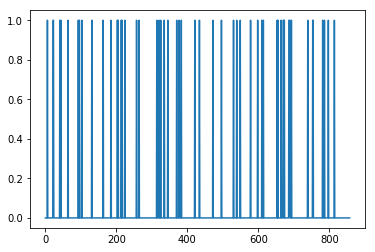

In [23]:
plt.plot(y)

In [25]:
ndf = data[data['Biopsy']==1]

In [28]:
ndf

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,0,0,0,0,0,0,1,1,0,1
22,40,1.0,18.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,...,2.0,2.0,0,0,0,0,0,1,1,1
23,40,1.0,20.0,2.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,0,1,0,1,0,1,1,0,1
41,37,2.0,18.0,0,0.0,0.0,0.0,0.0,0.0,0,...,15.0,15.0,0,1,0,1,0,1,0,1
44,37,3.0,19.0,3.0,1.0,12.0,6.0,1.0,13.0,0.0,...,0,0,0,0,0,0,0,1,0,1
64,38,2.0,15.0,4.0,0.0,0.0,0.0,1.0,16.0,0.0,...,0,0,1,0,1,0,0,1,0,1
93,33,1.0,29.0,2.0,0.0,0.0,0.0,1.0,0.5,0.0,...,0,0,0,0,0,0,0,1,1,1
96,35,5.0,11.0,0,1.0,15.0,15.0,1.0,14.0,0.0,...,0,0,0,0,0,0,1,1,1,1
103,38,3.0,18.0,4.0,0.0,0.0,0.0,1.0,10.0,1.0,...,0,0,0,0,0,0,0,1,1,1
131,30,0,13.0,3.0,1.0,22.0,3.3,0.0,0.0,0.0,...,3.0,3.0,0,0,0,0,1,1,0,1


In [29]:
len(ndf)

55

total negative records = 803
,total positive records = 55

In [39]:
X = data.iloc[:,0:34].values
y = data.iloc[:, -1].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 6)

In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [43]:
DT_classifier = DecisionTreeClassifier(criterion='entropy',random_state=2)

In [45]:
DT_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

In [46]:
pred = DT_classifier.predict(X_test)

In [47]:
cm = confusion_matrix(y_test,pred)


In [48]:
cm

array([[235,   5],
       [  8,  10]], dtype=int64)

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
NB_classifier = GaussianNB()

In [51]:
NB_classifier.fit(X_train,y_train)

GaussianNB(priors=None)

In [52]:
nb_pred = NB_classifier.predict(X_test)

In [54]:
nb_cm = confusion_matrix(y_test, nb_pred)

In [55]:
nb_cm

array([[  8, 232],
       [  0,  18]], dtype=int64)